Work by - Kartikey Singh

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import matplotlib
# matplotlib.use('TkAgg')

### Reading the data

In [42]:
dataset = pd.read_csv('Traffic_Volume.csv')
dataset.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918


* holiday, temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time are our independent variables
* traffic_volume is our dependent variable

In [43]:
# data shape
dataset.shape

(48204, 9)

In [44]:
# column data type information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48151 non-null  float64
 2   rain_1h              48202 non-null  float64
 3   snow_1h              48192 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48155 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can separate the column types based on above information
* Numerical Data: temp, rain_1h, snow_1h, clouds_all, traffic_volume
* Categorical Data: holiday, weather_main, weather_description

### Checking for missing values

In [45]:
# Checking for any missing values in any column
dataset.isnull().any()

holiday                False
temp                    True
rain_1h                 True
snow_1h                 True
clouds_all             False
weather_main            True
weather_description    False
date_time              False
traffic_volume         False
dtype: bool

Since we have missing values for temp, rain_1h, snow_1h and weather_main, we'll resolve them based on their data type.

### Missing Values Treatment

For numerical data, we'll replace the missing values with the respective mean of the column.

In [46]:
from sklearn.impute import SimpleImputer

In [47]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [48]:
imputer = imputer.fit(dataset.iloc[:, [1,2,3]])

In [49]:
dataset.iloc[:, [1,2,3]] = imputer.transform(dataset.iloc[:, [1,2,3]])

For categorical data, we'll replace missing values with the most frequently occuring value

In [50]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [51]:
imputer = imputer.fit(dataset.iloc[:, [5]])

In [52]:
dataset.iloc[:, [5]] = imputer.transform(dataset.iloc[:, [5]])

In [53]:
# Checking for missing values again
dataset.isnull().any()

holiday                False
temp                   False
rain_1h                False
snow_1h                False
clouds_all             False
weather_main           False
weather_description    False
date_time              False
traffic_volume         False
dtype: bool

Hence, we've resolved the missing values by replacing using respective methods.

### Statistical Analysis

In [54]:
# Basic stats for all columns
dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
holiday,48204,12,None,48143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp,48204,NaN,NaN,NaN,281.205,13.3363,0,272.18,282.429,291.8,310.07
rain_1h,48204,NaN,NaN,NaN,0.334278,44.7891,0,0,0,0,9831.3
snow_1h,48204,NaN,NaN,NaN,0.000222444,0.00816761,0,0,0,0,0.51
clouds_all,48204,NaN,NaN,NaN,49.3622,39.0158,0,1,64,90,100
weather_main,48204,11,Clouds,15193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_description,48204,38,sky is clear,11665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_time,48204,40575,19-05-2013 10:00,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traffic_volume,48204,NaN,NaN,NaN,3259.82,1986.86,0,1193,3380,4933,7280


 * For numerical data, we can see the mean, median, std, min, max.
 * For categorical data, we can see the frequency of the most occuring value and no of unique values. 

In [55]:
# Basic stats for just numerical data
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205351,13.336338,0.0,272.18,282.429,291.8,310.07
rain_1h,48204.0,0.334278,44.789133,0.0,0.00,0.000,0.0,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.000,0.0,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.000,90.0,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.000,4933.0,7280.00


In [56]:
# Basic stats for just categorical data
dataset.describe(include='object').transpose()

,count,unique,top,freq
holiday,48204,12,None,48143
weather_main,48204,11,Clouds,15193
weather_description,48204,38,sky is clear,11665
date_time,48204,40575,19-05-2013 10:00,6


In [57]:
# Getting count of each unique value for categorical data
dataset.groupby(['weather_main']).size()

weather_main
Clear           13383
Clouds          15193
Drizzle          1818
Fog               912
Haze             1359
Mist             5942
Rain             5665
Smoke              20
Snow             2875
Squall              4
Thunderstorm     1033
dtype: int64

In [195]:
# Below code is an attempt to reduce the time it takes to calculate extra stats like mode, variance, skewness, kurtosis
# as well as count analysis for categorical data by operating on them at once

# Separate stats for each column, where categorical and numerical both have their stats
for x in dataset.columns[:-1]:
    print(f"Basic stats for column "+x)
    if dataset[x].dtype == 'int64' or dataset[x].dtype == 'float64':
        col_mean = dataset[x].mean()
        print("Mean:", col_mean)
        col_median = dataset[x].median()
        print("Median:", col_median)
        col_mode = dataset[x].mode()
        print(f"Mode:\n{col_mode}")
        col_var = dataset[x].var()
        print("Variance:", col_var)
        col_std = dataset[x].std()
        print("Standard Deviation:", col_std)
        col_min = dataset[x].min()
        print("Min:", col_min)
        col_max = dataset[x].max()
        print("Max:", col_max)
        col_range = col_max - col_min
        print("Range:", col_range)
        col_q1 = dataset[x].quantile(0.25)
        print("Q1 (25%):", col_q1)
        col_q3 = dataset[x].quantile(0.75)
        print("Q3 (75%):", col_q3)
        col_iqr = col_q3 - col_q1
        print("IQR:", col_iqr)
        col_skew = dataset[x].skew()
        print("Skewness:", col_skew)
        col_kurt = dataset[x].kurt()
        print("Kurtosis:", col_kurt)
        print('\n')
    elif dataset[x].dtype == 'object':
        col_unique = dataset.groupby(x).size()
        print("Unique Values:", col_unique)
        print('\n')
    

Basic stats for column holiday
Unique Values: holiday
Christmas Day                    6
Columbus Day                     5
Independence Day                 5
Labor Day                        7
Martin Luther King Jr Day        6
Memorial Day                     5
New Years Day                    6
None                         48143
State Fair                       5
Thanksgiving Day                 6
Veterans Day                     5
Washingtons Birthday             5
dtype: int64


Basic stats for column temp
Mean: 281.2053507092272
Median: 282.42900000000003
Mode:
0    274.15
dtype: float64
Variance: 177.85790278967227
Standard Deviation: 13.336337682800037
Min: 0.0
Max: 310.07
Range: 310.07
Q1 (25%): 272.18
Q3 (75%): 291.8
IQR: 19.620000000000005
Skewness: -2.2481211761236772
Kurtosis: 39.93893171304241


Basic stats for column rain_1h
Mean: 0.33427783079540263
Median: 0.0
Mode:
0    0.0
dtype: float64
Variance: 2006.0664335645336
Standard Deviation: 44.7891329851844
Min: 0.0
Max: 

### Dataset visualizations

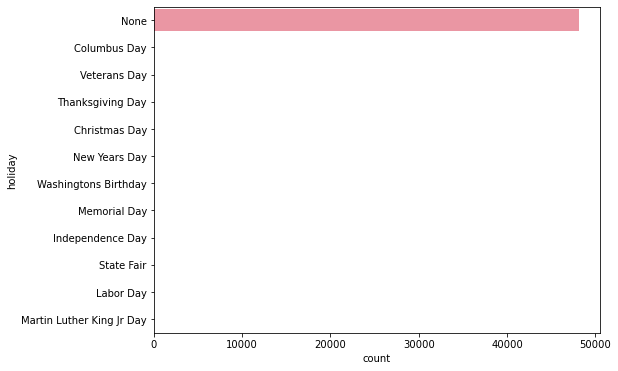

In [59]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = dataset)
plt.show()

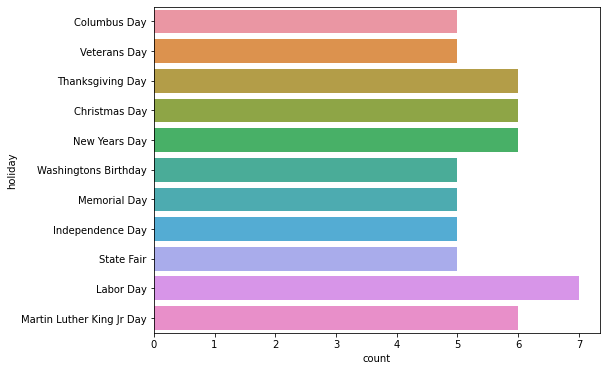

In [60]:
#Plotting frequency of each category in holiday column without 'None' data
holidays = dataset.loc[dataset.holiday != 'None']
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = holidays)
plt.show()

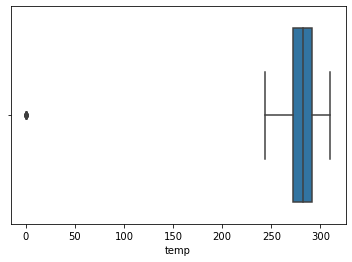

In [61]:
# plotting distribution of temperature variable
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = dataset)
plt.show()

We can see outliers in temp data, which we'll clean in data cleaning process

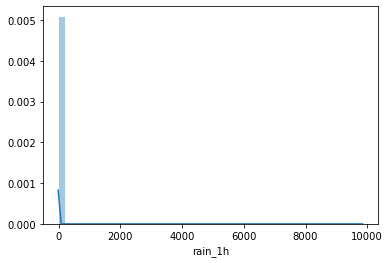

In [62]:
#Plotting rain variable
plt.figure(figsize=(6,4))
sns.distplot(dataset.rain_1h)
plt.show()
#From the distribution, it shows that the data is extremely skewed. 
#Most of the observations are concentrated around 0.

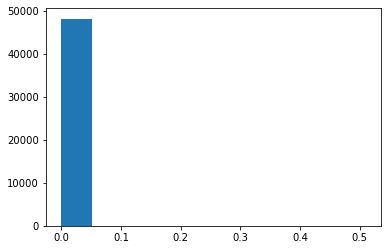

In [63]:
#Plotting snow variable indicates that data is again skewed and most of the observations have value close to 0.0.
plt.hist(dataset.snow_1h)
plt.show()

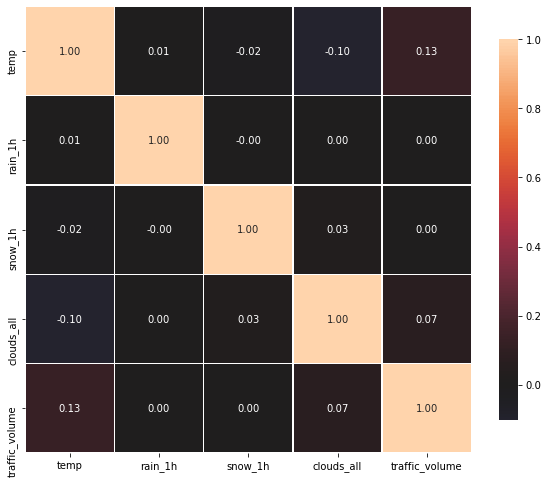

In [86]:
# Checking correlation between independent variables
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show()
    
correlation_heatmap(dataset)
# There is no strong corelation between independent variables

In [87]:
# Check unique values for each column in dataset
def return_unique(data):
    data_unique = {}
    for col in data.columns:
        unique_vals = dataset[col].unique()
        unique_vals = np.sort([str(i).strip() for i in unique_vals])
        data_unique[col] = unique_vals
    return data_unique

unique_values = return_unique(dataset)
unique_values

{'holiday': array(['Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day',
        'Martin Luther King Jr Day', 'Memorial Day', 'New Years Day',
        'None', 'State Fair', 'Thanksgiving Day', 'Veterans Day',
        'Washingtons Birthday'], dtype='<U25'),
 'temp': array(['0.0', '243.39', '243.62', ..., '309.08', '309.29', '310.07'],
       dtype='<U18'),
 'rain_1h': array(['0.0', '0.25', '0.26', '0.27', '0.28', '0.29', '0.3', '0.31',
        '0.32', '0.33', '0.33427783079540263', '0.34', '0.35', '0.36',
        '0.37', '0.38', '0.4', '0.41', '0.42', '0.43', '0.44', '0.45',
        '0.46', '0.47', '0.48', '0.5', '0.51', '0.52', '0.53', '0.54',
        '0.55', '0.56', '0.57', '0.58', '0.59', '0.6', '0.61', '0.62',
        '0.63', '0.64', '0.65', '0.66', '0.67', '0.68', '0.69', '0.7',
        '0.71', '0.72', '0.73', '0.74', '0.76', '0.77', '0.78', '0.79',
        '0.8', '0.81', '0.83', '0.84', '0.85', '0.86', '0.87', '0.88',
        '0.89', '0.9', '0.91', '0.92', '0.93', '0.9

### Dataset cleaning

In [78]:
dataset_features = dataset.copy()

In [79]:
#Extracting features from date_time variable
dataset_features['date_time'] = pd.to_datetime(dataset_features.date_time)
dataset_features['weekday'] = dataset_features.date_time.dt.weekday
dataset_features['date'] = dataset_features.date_time.dt.date
dataset_features['hour'] = dataset_features.date_time.dt.hour
dataset_features['month'] = dataset_features.date_time.dt.month
dataset_features['year'] = dataset_features.date_time.dt.year

In [80]:
dataset_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month,year
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-02-10 09:00:00,5545,4,2012-02-10,9,2,2012
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-02-10 10:00:00,4516,4,2012-02-10,10,2,2012
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 11:00:00,4767,4,2012-02-10,11,2,2012
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-02-10 12:00:00,5026,4,2012-02-10,12,2,2012
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-02-10 13:00:00,4918,4,2012-02-10,13,2,2012


In [81]:
#Other holidays are very sparse compared to none holidays as we can see in count analysis
def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
dataset_features['holiday'] = dataset_features['holiday'].map(modify_holiday)

In [83]:
#Outlier in temp which was detected earlier needs to be removed
dataset_features = dataset_features.loc[dataset_features.temp>100]

In [94]:
#The weather description mostly describes rain, snow, thunderstorms, fog, mist and haze.
# Converting it to
#thunderstorm - True where weather description contains Thunderstorm else False
#fog - True where weather description contains fog else False
#mist - True where weather description contains mist else False
#haze - True where weather description contains haze else False

In [95]:
dataset_features['weather_description'] = dataset_features['weather_description'].map(lambda x:x.lower())

In [97]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
dataset_features.loc[dataset_features['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'

In [99]:
#Any row containing "fog" is replaced by "fog"
dataset_features.loc[dataset_features['weather_description'].str.contains('fog'),'weather_description'] = 'fog'

In [100]:
#Any row containing "mist" is replaced by "mist"
dataset_features.loc[dataset_features['weather_description'].str.contains('mist'),'weather_description'] = 'mist'

In [101]:
#Any row containing "haze" is replaced by "haze"
dataset_features.loc[dataset_features['weather_description'].str.contains('haze'),'weather_description'] = 'haze'

In [103]:
weather = ['thunderstorm','mist','fog','haze']
dataset_features.loc[np.logical_not(dataset_features['weather_description'].isin(weather)),'weather_description'] = 'other'

In [104]:
dataset_features.weather_description.value_counts()

other           38938
mist             5950
haze             1360
thunderstorm     1034
fog               912
Name: weather_description, dtype: int64

In [105]:
dataset_features = pd.get_dummies(columns=['weather_description'],data=dataset_features)

In [107]:
dataset_features.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
dataset_features.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)

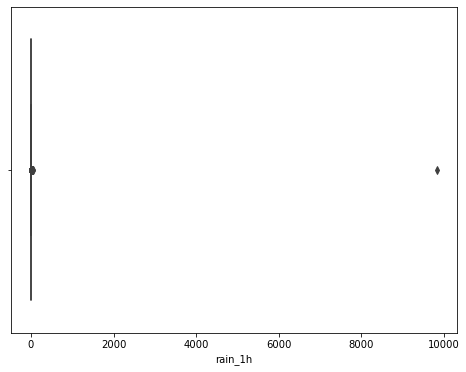

In [109]:
# We can see outlier in rain_1h column
plt.figure(figsize=(8,6))
sns.boxplot('rain_1h',data = dataset_features)
plt.show()

In [114]:
#Removing outlier in rain column and converting numeric data to categories
#rain value equal to 0.0 as no_rain
#rain value greater than 0.0 is cut into 3 quantiles

dataset_features = dataset_features.loc[dataset_features.rain_1h<2000]
dataset_features_temp = dataset_features.loc[dataset_features.rain_1h>0]
rain_q = pd.DataFrame(pd.qcut(dataset_features_temp['rain_1h'] ,q=3, labels=['light','moderate','heavy']))
dataset_cat = dataset_features.merge(rain_q,left_index=True, right_index=True, how='left')
dataset_cat['rain_1h_y'] = dataset_cat.rain_1h_y.cat.add_categories('no_rain')
dataset_cat['rain_1h_y'].fillna('no_rain', inplace = True) 

#no_rain is not in the category, adding it and filling
dataset_cat.drop(columns=['rain_1h_x'], inplace = True)
dataset_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
dataset_cat.head()

,holiday,temp,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,False,288.28,0.0,40,2012-02-10 09:00:00,5545,4,2012-02-10,9,2,2012,0,0,0,0,no_rain
1,False,289.36,0.0,75,2012-02-10 10:00:00,4516,4,2012-02-10,10,2,2012,0,0,0,0,no_rain
2,False,289.58,0.0,90,2012-02-10 11:00:00,4767,4,2012-02-10,11,2,2012,0,0,0,0,no_rain
3,False,290.13,0.0,90,2012-02-10 12:00:00,5026,4,2012-02-10,12,2,2012,0,0,0,0,no_rain
4,False,291.14,0.0,75,2012-02-10 13:00:00,4918,4,2012-02-10,13,2,2012,0,0,0,0,no_rain


In [117]:
dataset_features.snow_1h[dataset_features.snow_1h>0].count()
#only 63 observations have snow greater than 0.0, it can be encoded as no_snow and 

75

In [121]:
def modify_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'
dataset_date = dataset_features.groupby('year').aggregate({'traffic_volume':'mean'})    
dataset_date['snow_1h'] = dataset_cat.snow_1h.map(modify_snow1h)

In [122]:
dataset_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,False,288.28,0.0,0.0,40,2012-02-10 09:00:00,5545,4,2012-02-10,9,2,2012,0,0,0,0
1,False,289.36,0.0,0.0,75,2012-02-10 10:00:00,4516,4,2012-02-10,10,2,2012,0,0,0,0
2,False,289.58,0.0,0.0,90,2012-02-10 11:00:00,4767,4,2012-02-10,11,2,2012,0,0,0,0
3,False,290.13,0.0,0.0,90,2012-02-10 12:00:00,5026,4,2012-02-10,12,2,2012,0,0,0,0
4,False,291.14,0.0,0.0,75,2012-02-10 13:00:00,4918,4,2012-02-10,13,2,2012,0,0,0,0


In [123]:
#setting date as index
dataset_cat.set_index('date', inplace = True)

### Label Encoding

In [127]:
target = ['traffic_volume']
cat_vars = ['holiday', 'snow_1h','weekday', 'hour', 'month', 'year', 'fog', 'haze','mist', 'thunderstorm', 'rain_1h']
num_vars = ['temp','clouds_all']

In [133]:
#Creating pipeline to transform data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('oneHot',OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_vars),
    ('cat',categorical_transformer,cat_vars)])

dataset_transformed = preprocessor.fit_transform(dataset_cat).toarray()

In [137]:
dataset_transformed

array([[ 0.55218363, -0.24022525,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63717451,  0.65690832,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.65448747,  1.04139413,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.11542495,  1.04139413,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.06505998,  1.04139413,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.06742084,  1.04139413,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

### Splitting Data

In [143]:
#Splitting data into train and test data
X = dataset_transformed
y = dataset_cat.traffic_volume

In [145]:
y

date
2012-02-10    5545
2012-02-10    4516
2012-02-10    4767
2012-02-10    5026
2012-02-10    4918
              ... 
2018-09-30    3543
2018-09-30    2781
2018-09-30    2159
2018-09-30    1450
2018-09-30     954
Name: traffic_volume, Length: 48193, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

## Building Model

Since we have a regression type problem, we have Linear or Logistic Regression as options.
Since we're predicting traffic volume(which is a continuous data), we'll use Simple Linear Regression here.

#### Using statsmodel

In [181]:
import statsmodels.api as sm
stats_model = sm.OLS(y, X).fit()

In [182]:
predictions = stats_model.predict(X)

In [183]:
# Print out the statistics
stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         traffic_volume   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2847.
Date:                Fri, 13 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:19:57   Log-Likelihood:            -3.9548e+05
No. Observations:               48193   AIC:                         7.911e+05
Df Residuals:                   48124   BIC:                         7.917e+05
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            81.3455      5.072     16.040      0.000      71.405      91.286
x2           -30.3187      4.296     -7.057      0.000     -38.739     -21.899
x3           445.6793     52.756      8.448      0.000     342.276     549.082
x4           443.6001     69.591      6.374      0.000     307.201     579.999
x5           280.5544    124.118      2.260      0.024      37.281     523.828
x6           536.1505    267.323      2.006      0.045      12.193    1060.107
x7          -222.1953    251.589     -0.883      0.377    -715.312     270.922
x8            87.7374    266.691      0.329      0.742    -434.980     610.455
x9           332.8043    591.853      0.562      0.574    -827.235    1492.843
x10         -729.8330    356.243     -2.049      0.040   -1428.075     -31.591
x11          584.9948    356.231      1.642      0.101    -113.222    1283.212
x12          136.3306    488.702      0.279      0.780    -821.532    1094.194
x13        -1490.7499    827.395     -1.802      0.072   -3112.456     130.956
x14           51.7952    356.361      0.145      0.884    -646.678     750.268
x15          320.8187    386.527      0.830      0.407    -436.780    1078.417
x16          517.7019    591.743      0.875      0.382    -642.122    1677.526
x17          483.1699    356.837      1.354      0.176    -216.235    1182.574
x18          180.1923     11.576     15.565      0.000     157.502     202.882
x19          292.2641     11.750     24.873      0.000     269.234     315.295
x20          348.6220     11.729     29.724      0.000     325.634     371.610
x21          354.0874     11.799     30.010      0.000     330.961     377.214
x22          359.3758     11.713     30.681      0.000     336.418     382.334
x23         -210.1985     11.756    -17.881      0.000    -233.239    -187.157
x24         -435.0637     11.828    -36.782      0.000    -458.247    -411.880
x25        -2404.1511     19.513   -123.205      0.000   -2442.398   -2365.905
x26        -2710.2525     19.319   -140.288      0.000   -2748.118   -2672.387
x27        -2842.5694     19.469   -146.006      0.000   -2880.729   -2804.410
x28        -2860.4277     19.456   -147.021      0.000   -2898.562   -2822.294
x29        -2521.1657     19.181   -131.443      0.000   -2558.760   -2483.571
x30        -1124.5824     19.312    -58.232      0.000   -1162.434   -1086.730
x31          923.5310     19.216     48.060      0.000     885.867     961.195
x32         1527.3746     19.238     79.393      0.000    1489.667    1565.082
x33         1370.1528     19.201     71.360      0.000    1332.519    1407.786
x34         1158.2526     19.432     59.604      0.000    1120.165    1196.340
x35          952.0424     19.176     49.648      0.000     914.458     989.627
x36         1221.0070     19.768     61.766      0.000    1182.261    1259.753
x3

We can see that the R-squared value is 0.801

#### Using sklearn

In [179]:
from sklearn import linear_model

In [180]:
lm = linear_model.LinearRegression()
sklearn_model = lm.fit(X,y)

In [184]:
predictions = lm.predict(X)

In [186]:
# getting R-squared score
lm.score(X,y)

0.800908742651367

As we can see, using both statsmodel and sklearn, we obtain R-squared value of 80%

### Saving final model

In [187]:
import statsmodels.api as sm
final_model = sm.OLS(y, X).fit()

In [188]:
import joblib

In [189]:
joblib.dump(final_model, 'traffic_vol.h5')

['traffic_vol.h5']